## Lecture

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

e:\conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Thomas\AppData\Local\Temp\ipykernel_26312\806017954.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


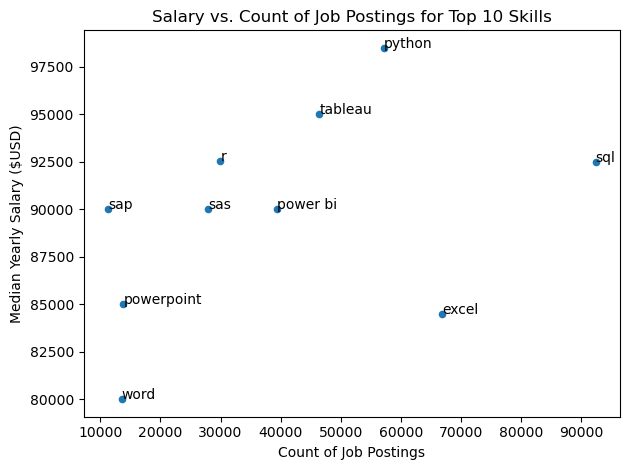

In [19]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_exploded = df_da.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(10)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.legend().set_visible(False)
plt.tight_layout()
skill_stats
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)

## Homework

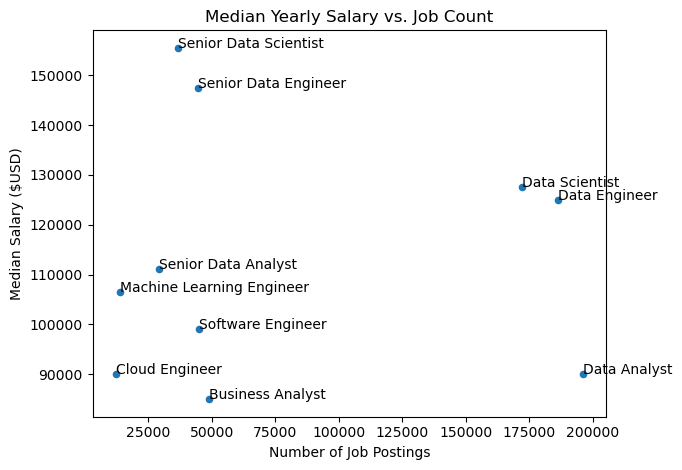

In [36]:
df_plot = df.groupby('job_title_short').agg(
    count = ('job_title_short', 'count'),
    median = ('salary_year_avg','median')
)
df_plot = df_plot.sort_values(by='count',ascending=False)
df_plot.plot(kind='scatter',x='count',y='median')
plt.xlabel('Number of Job Postings')
plt.ylabel('Median Salary ($USD)')
plt.title('Median Yearly Salary vs. Job Count')
plt.tight_layout()
for i, txt in enumerate(df_plot.index):
    plt.text(df_plot['count'].iloc[i],df_plot['median'].iloc[i],txt)

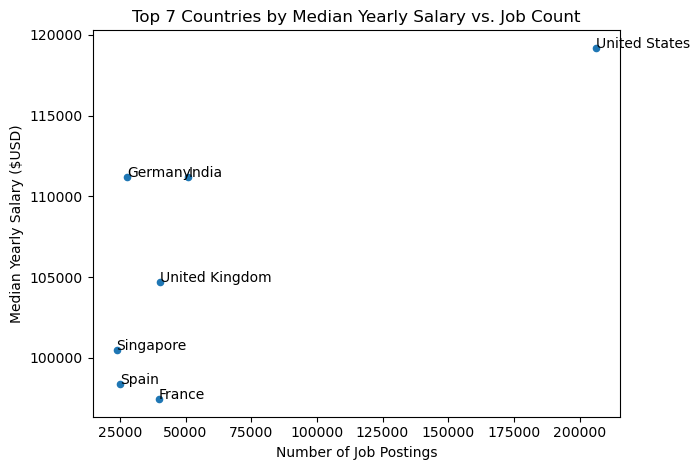

In [76]:
df_top7_country = df['job_country'].value_counts().sort_values(ascending=False)
df_top7_country = list(df_top7_country.head(7).index)
df_plot = df[df['job_country'].isin(df_top7_country)]
df_plot = df_plot.groupby('job_country').agg(
    job_count = ('job_country','count'),
    median_year_salary = ('salary_year_avg','median')
)
df_plot = df_plot.sort_values(by='job_count',ascending=False)
df_plot.plot(kind='scatter',x='job_count',y='median_year_salary')
plt.xlabel('Number of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Top 7 Countries by Median Yearly Salary vs. Job Count')
plt.tight_layout()
for i, txt in enumerate(df_plot.index):
    plt.text(df_plot['job_count'].iloc[i],df_plot['median_year_salary'].iloc[i],txt)

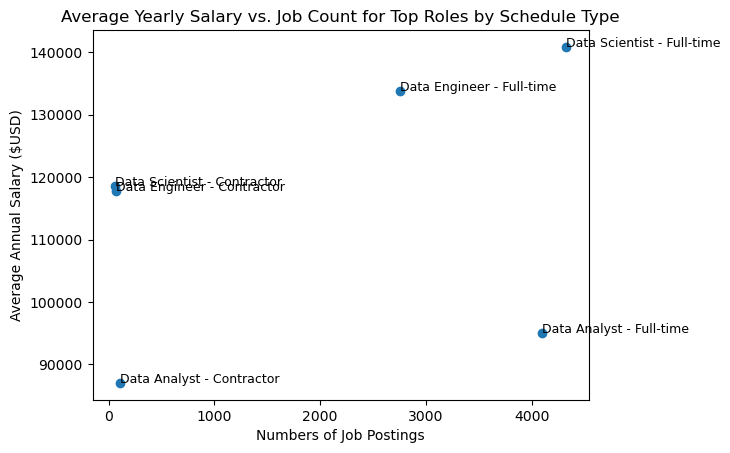

In [128]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
target_job_schedule = ['Full-time', 'Contractor']
df_filtered = df[df['job_title_short'].isin(target_job_titles)].copy()
df_filtered = df_filtered[df_filtered['job_country']=='United States']
df_filtered = df_filtered[df_filtered['job_schedule_type'].isin(target_job_schedule)]
df_filtered = df_filtered[pd.notna(df_filtered['salary_year_avg'])]
df_filtered['job_title_type'] = df_filtered['job_title_short'] + ' - ' + df_filtered['job_schedule_type']
df_plot = df_filtered.groupby('job_title_type').agg(
    job_count = ('job_title_type', 'count'),
    mean_salary = ('salary_year_avg','mean')
)
df_plot = df_plot.sort_values(by='job_count',ascending=False)
plt.scatter(df_plot['job_count'], df_plot['mean_salary'])
plt.xlabel('Numbers of Job Postings')
plt.ylabel('Average Annual Salary ($USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
for i,txt in enumerate(df_plot.index):
    plt.text(df_plot['job_count'].iloc[i],df_plot['mean_salary'].iloc[i],txt, fontsize=9)